In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data from a csv file
filename = '/Users/administrator/Desktop/CIND820 Big Data Analytics Project/datanerd-startup-venture-funding/data/investments.csv'
df = pd.read_csv(filename)

In [3]:
# removing features
df = df.drop(['investor_category_list','investor_market','funded_at', 'company_state_code','investor_state_code','funding_round_code',
                      'funded_month','funded_quarter','funding_round_permalink'], axis=1)

#replace all Nan to 0 in raised_amount_usd column
df['raised_amount_usd'] = df['raised_amount_usd'].fillna(0)

#convert column raised_amount_usd from float to int
df = df.astype({"raised_amount_usd":'int'})

In [4]:
# average funding by each funding round type
pd.pivot_table(df, index='funding_round_type',values='raised_amount_usd',
               aggfunc=np.mean).sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
funding_round_type,
post_ipo_debt,3.739191e+08
post_ipo_equity,2.932484e+08
private_equity,6.984986e+07
secondary_market,2.114250e+07
debt_financing,2.038674e+07
venture,1.427274e+07
grant,5.488604e+06
undisclosed,1.851566e+06
product_crowdfunding,1.241036e+06


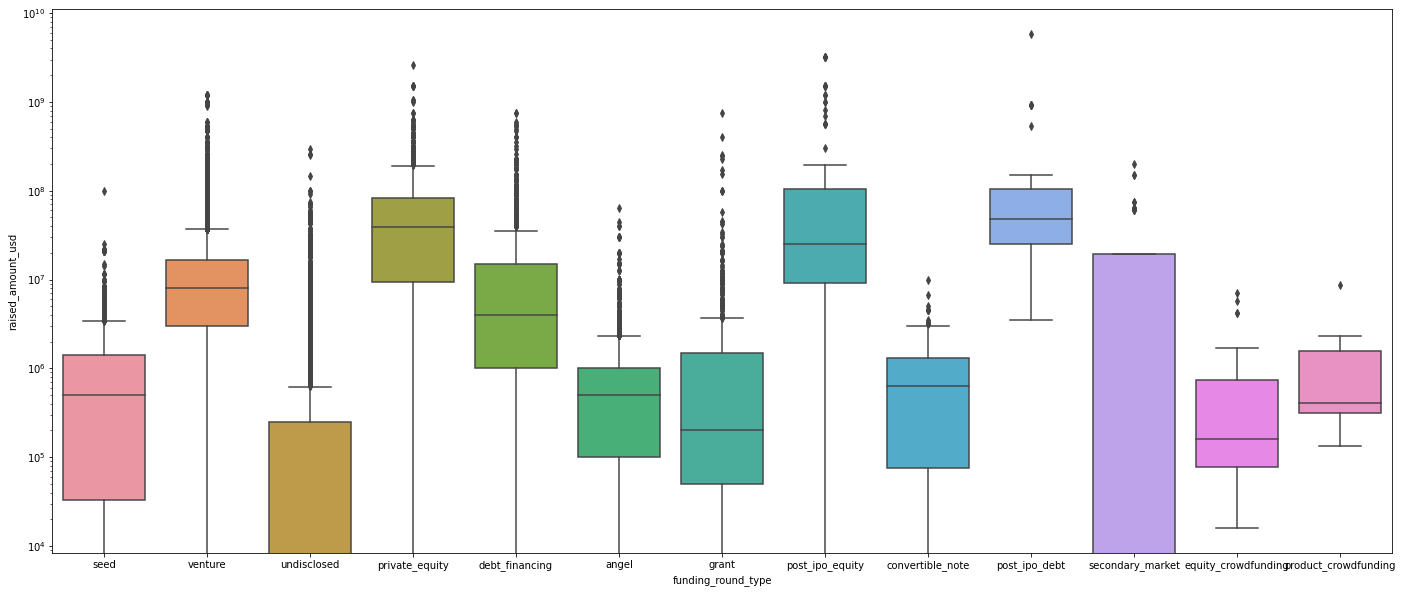

In [5]:
# Lets see the range of funding by each funding round type
plt.figure(figsize=(24,10))
sns.boxplot(x='funding_round_type',y='raised_amount_usd',data=df)
plt.yscale('log')
plt.show()

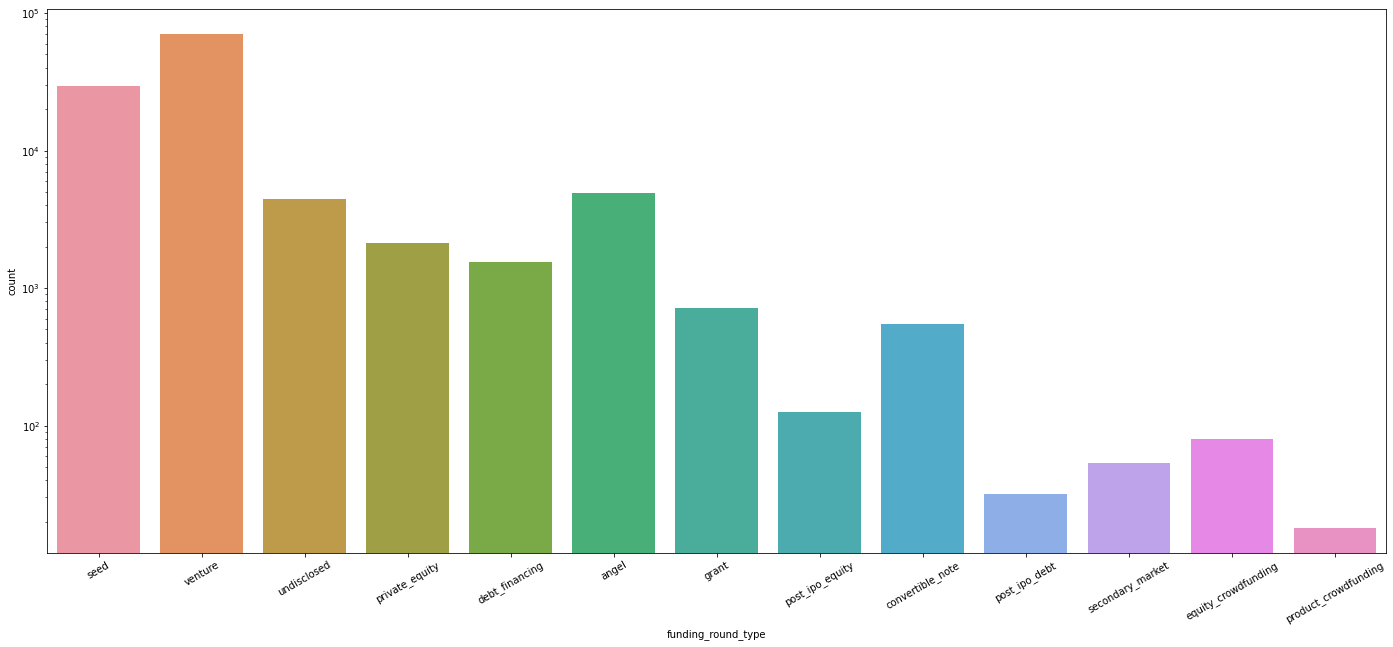

In [6]:
# Number of funding made by each funding round type

plt.figure(figsize=(24,10))
sns.countplot(x='funding_round_type',data=df)
plt.yscale('log')
plt.xticks(rotation=30)
plt.show()

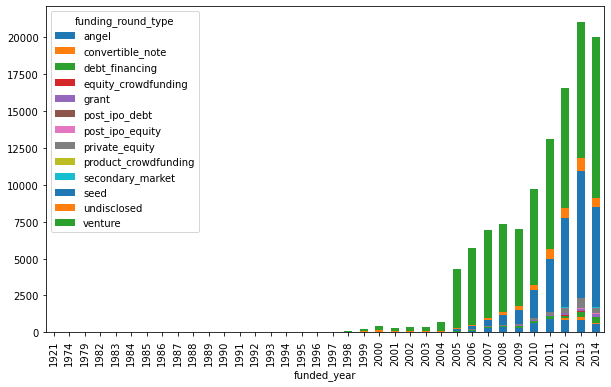

In [7]:
df.groupby('funded_year')['funding_round_type'].value_counts().unstack().plot(kind = 'bar', 
                                                                stacked = True, 
                                                                figsize = (10, 6))

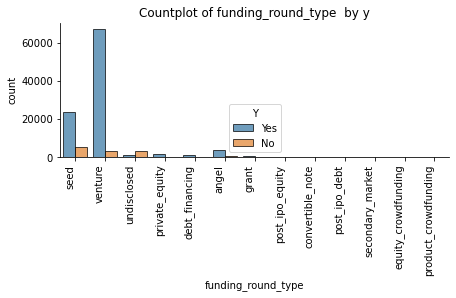

In [8]:
plt.figure(figsize=[12,14])
features=["funding_round_type"]
n=1
for f in features:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='Y', edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Countplot of {}  by y".format(f))
    n=n+1
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### Analysis of selective funding round type - Venture, Seed, Private Equity and Angel

In [9]:
# Filter the data which contains only these round type
df_new = df[(df['funding_round_type']=='venture')|
      (df['funding_round_type']=='seed')|
      (df['funding_round_type']=='angel')|
      (df['funding_round_type']=='private_equity')]

In [10]:
# investment made by the funding round type
pd.pivot_table(data=df_new, index='funding_round_type',values='raised_amount_usd',
               aggfunc=np.mean).sort_values(by='raised_amount_usd', ascending=False)

,raised_amount_usd
funding_round_type,
private_equity,6.984986e+07
venture,1.427274e+07
angel,9.035363e+05
seed,8.808792e+05


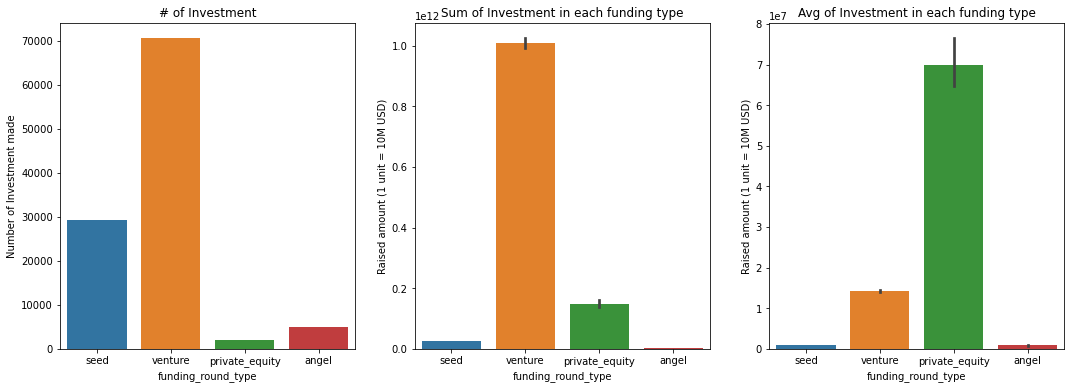

In [11]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.countplot(x='funding_round_type',data=df_new)
plt.title('# of Investment')
plt.ylabel('Number of Investment made')

plt.subplot(1,3,2)
sns.barplot(x='funding_round_type',y='raised_amount_usd',data=df_new,estimator=np.sum)
plt.title('Sum of Investment in each funding type')
plt.ylabel('Raised amount (1 unit = 10M USD)')

plt.subplot(1,3,3)
sns.barplot(x='funding_round_type',y='raised_amount_usd',data=df_new, estimator=np.mean)
plt.title('Avg of Investment in each funding type')
plt.ylabel('Raised amount (1 unit = 10M USD)')

plt.show()



In [12]:
# summary of funding
df_new['raised_amount_usd'].describe()

count    1.069090e+05
mean     1.110025e+07
std      3.221051e+07
min      0.000000e+00
25%      8.000000e+05
50%      3.600000e+06
75%      1.200000e+07
max      2.600000e+09
Name: raised_amount_usd, dtype: float64

In [13]:
# Now considering the investment in the range of 5 million to 15 million USD,

print('Venture fund average = ',round(df_new[df_new['funding_round_type']=='venture']['raised_amount_usd'].mean(), 2))
print('Seed fund average = ',round(df_new[df_new['funding_round_type']=='seed']['raised_amount_usd'].mean(), 2))
print('Angel fund average = ',round(df_new[df_new['funding_round_type']=='angel']['raised_amount_usd'].mean(), 2))
print('Private equity fund average = ',round(df_new[df_new['funding_round_type']=='private_equity']['raised_amount_usd'].mean(), 2))

Venture fund average =  14272735.18
Seed fund average =  880879.17
Angel fund average =  903536.31
Private equity fund average =  69849856.62


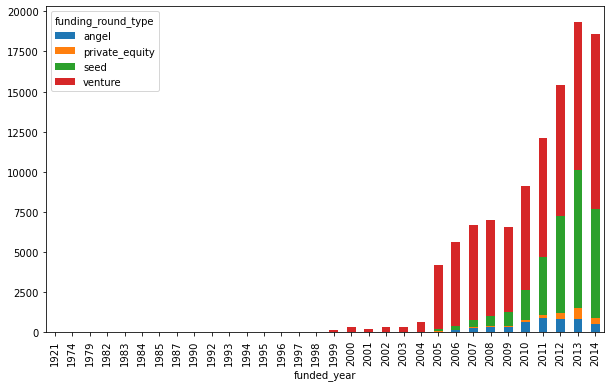

In [15]:
df_new.groupby('funded_year')['funding_round_type'].value_counts().unstack().plot(kind = 'bar', 
                                                                stacked = True, 
                                                                figsize = (10, 6))

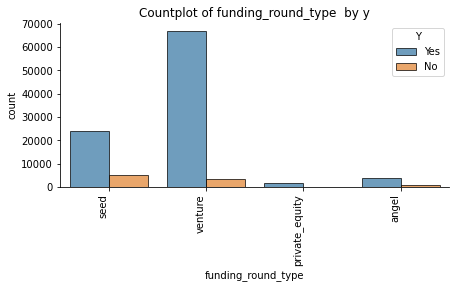

In [16]:
plt.figure(figsize=[12,14])
features=["funding_round_type"]
n=1
for f in features:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='Y', edgecolor="black", alpha=0.7, data=df_new)
    sns.despine()
    plt.title("Countplot of {}  by y".format(f))
    n=n+1
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()